In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.datasets import load_iris, load_digits
from sklearn.datasets import fetch_20newsgroups

# Обучение без учителя 
<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Юрий</p>
<p>к.ф.-м.н., доцент кафедры ИТЗИ УрГУПС (Екатеринбург)</p>
<p>yuchernyshov@usurt.ru</p>

# Содержание <a name='contents'></a>
<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#cluster'>Кластеризация</a></li>
    <ol>
        <li><a href='#kmeans'>KMeans</a></li>
        <li><a href='#hierarchy'>Иерархическая кластеризация</a></li>
        <li><a href='#dbscan'>DBSCAN</a></li>
        <li><a href='#elbow'>Метод локтя</a></li>
    </ol>
<li><a href='#pca'>Понижение размерности</a></li>    
<li><a href='#ae'>Автокодировщики</a></li>    
<li><a href='#example1'>Пример 1: кластеризация датасета sklearn.datasets.iris (цветы ирисы)</a></li>
<li><a href='#example2'>Пример 2: кластеризация датасета sklearn.datasets.make_blobs (наборы точек)</a></li>
<li><a href='#example3'>Пример 3: кластеризация датасета sklearn.datasets.make_circles (вложенные окружности) </a></li>
<li><a href='#example4'>Пример 4: кластеризация датасета sklearn.datasets.make_moons (полуокружности) </a></li>
<li><a href='#example5'>Пример 5: использование TSNE для визуализации кластеров для набора рукописных цифр</a></li>
<li><a href='#example6'>Пример 6: обработка текстов </a></li>
<li><a href='#example7'>Пример 7: сингулярное разложение матриц </a></li>
<li><a href='#links'>Ссылки</a></li>    
<li><a href='#hometask'>Домашнее задание</a></li>    
</ol>

# Введение <a name='intro'></a>

Обучение без учителя (Unsupervised learning) это группа методов, которая работает с неразмеченными данными. При этом алгоритмы сами находят скрытые внутренние закономерности в данных.

Есть несколько типовых задач обучения без учителя:

- кластеризация - объединение группы объектов по общему признаку

- понижение размерности - выделение наиболее важных признаков

- автокодировщики - сжатие информации

<a href='#contents'>Назад к Содержанию</a>

# Кластеризация <a name='cluster'></a>



## KMeans <a name='kmeans'></a>

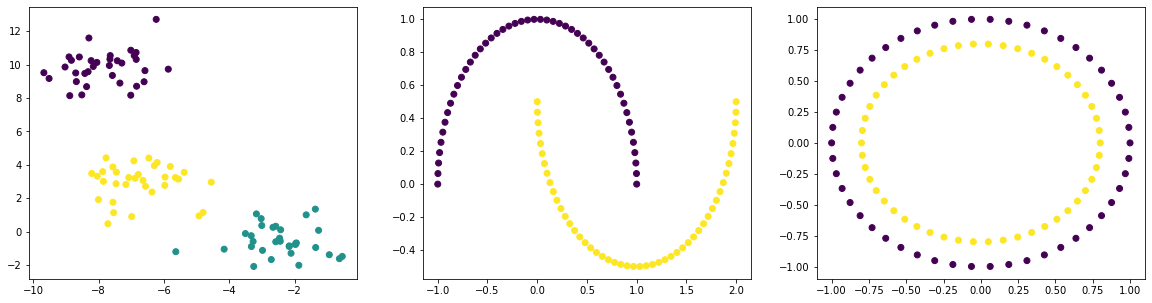

In [2]:
blobs, blobs_labels = make_blobs(100, cluster_std=1, centers=3)
moons, moons_labels = make_moons(100)
circles, circles_labels = make_circles(100)

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(blobs[:,0], blobs[:,1], c=blobs_labels)
plt.subplot(132)
plt.scatter(moons[:,0], moons[:,1], c=moons_labels)
plt.subplot(133)
plt.scatter(circles[:,0], circles[:,1], c=circles_labels)

plt.show()

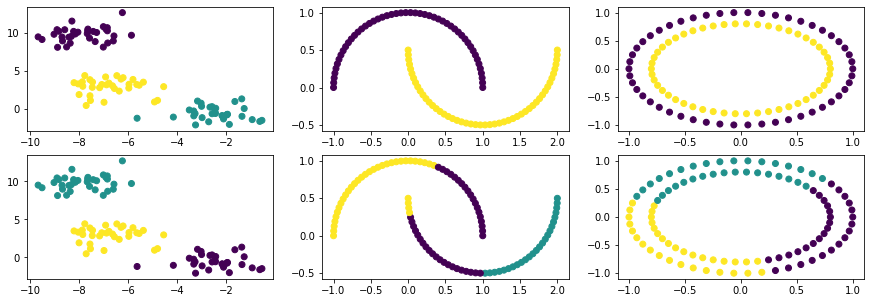

In [3]:
model = KMeans(n_clusters=3)

plt.figure(figsize=(15,5))

plt.subplot(231)
plt.scatter(blobs[:,0], blobs[:,1], c=blobs_labels)

plt.subplot(234)
blobs_result = model.fit(blobs)
blobs_result.labels_
plt.scatter(blobs[:,0], blobs[:,1], c=blobs_result.labels_)

plt.subplot(232)
plt.scatter(moons[:,0], moons[:,1], c=moons_labels)

plt.subplot(235)
moons_result = model.fit(moons)
moons_result.labels_
plt.scatter(moons[:,0], moons[:,1], c=moons_result.labels_)

plt.subplot(233)
plt.scatter(circles[:,0], circles[:,1], c=circles_labels)

plt.subplot(236)
circles_result = model.fit(circles)
circles_result.labels_
plt.scatter(circles[:,0], circles[:,1], c=circles_result.labels_)

plt.show()

<a href='#contents'>Назад к Содержанию</a>

## Иерархическая кластеризация <a name='hierarchy'></a>

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

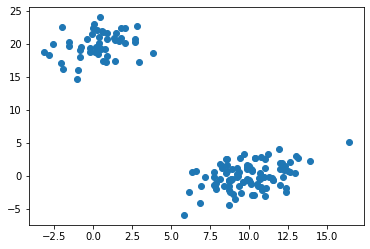

In [5]:
np.random.seed(4711)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [6]:
Z = linkage(X, 'ward')

In [7]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.9800148387574268

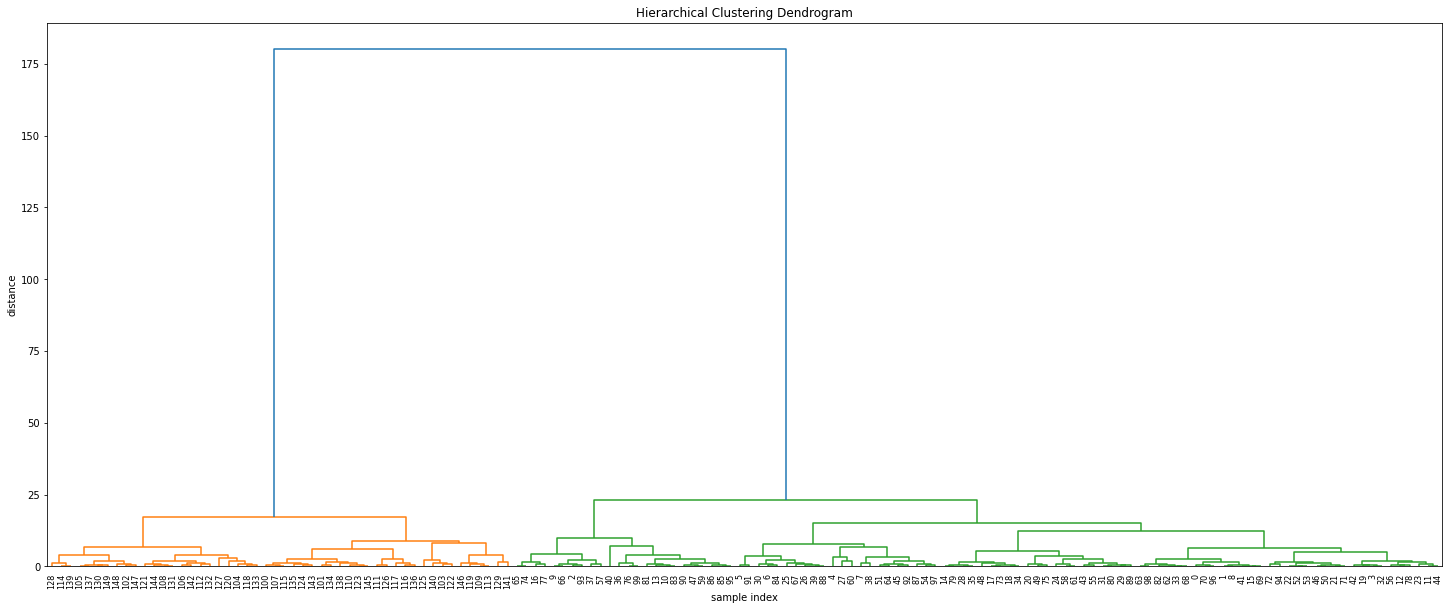

In [8]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

## DBSCAN <a name='dbscan'></a>

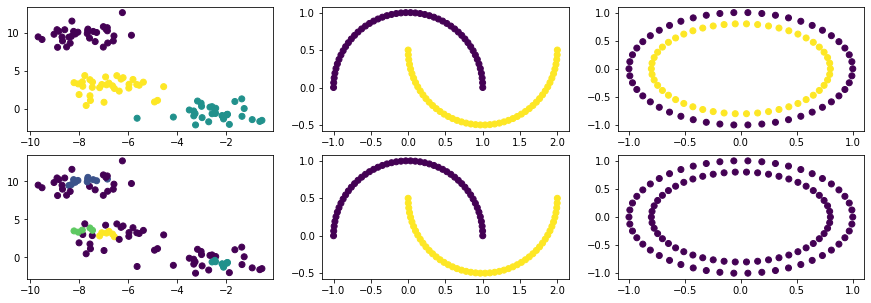

In [9]:
model = DBSCAN()

plt.figure(figsize=(15,5))

plt.subplot(231)
plt.scatter(blobs[:,0], blobs[:,1], c=blobs_labels)

plt.subplot(234)
blobs_result = model.fit(blobs)
blobs_result.labels_
plt.scatter(blobs[:,0], blobs[:,1], c=blobs_result.labels_)

plt.subplot(232)
plt.scatter(moons[:,0], moons[:,1], c=moons_labels)

plt.subplot(235)
moons_result = model.fit(moons)
moons_result.labels_
plt.scatter(moons[:,0], moons[:,1], c=moons_result.labels_)

plt.subplot(233)
plt.scatter(circles[:,0], circles[:,1], c=circles_labels)

plt.subplot(236)
circles_result = model.fit(circles)
circles_result.labels_
plt.scatter(circles[:,0], circles[:,1], c=circles_result.labels_)

plt.show()

<a href='#contents'>Назад к Содержанию</a>

## Метод локтя <a name='elbow'></a>

In [10]:
data = make_blobs()

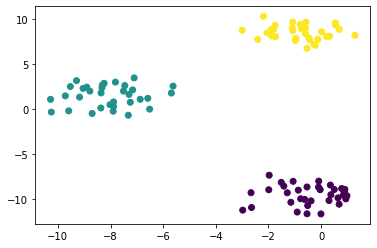

In [11]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1])
plt.show()

In [12]:
inertias_ = []
for k in range(1,6):
    model = KMeans(n_clusters=k)
    model.fit(data[0])
    inertias_.append(model.inertia_)
inertias_

[7027.271165766319,
 1916.0523882253965,
 224.06338290767644,
 188.3112858119622,
 158.08749375850505]

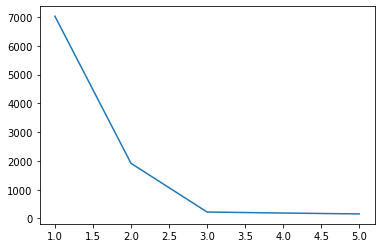

In [13]:
plt.plot(range(1,6), inertias_)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Понижение размерности <a name='pca'></a>

In [14]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

In [15]:
data = load_digits()

model = PCA(2)

In [16]:
points = model.fit_transform(data.data)

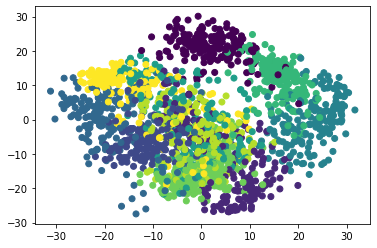

In [17]:
plt.scatter(points[:,0], points[:,1], c=data.target)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Автокодировщики <a name='ae'></a>

Автокодировщики (autoencoders) это нейронные сети, в которых внутренний (скрытый) слой имеет меньшую размерность, чем входной, и вход должен быть как можно ближе к выходу. По сути автокодировщики учатся сжимать сигнал (представлять меньшим количеством нейронов) с максимальным сохранением информации для восстановления.

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
import tensorflow.keras.layers as L

In [19]:
encoder = Sequential()
encoder.add(L.Dense(64))
encoder.add(L.Dense(32))
encoder.add(L.Dense(16))

decoder = Sequential()
decoder.add(L.Dense(32, input_shape=(16,)))
decoder.add(L.Dense(64))

inp = L.Input(shape=64)           
emb = encoder(inp)
out = decoder(emb)
            
model = Model(inputs=inp, outputs=out)
            
encoder.compile(optimizer='adam', loss='mse')
model.compile(optimizer='adam', loss='mse')

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
sequential (Sequential)      (None, 16)                6768      
_________________________________________________________________
sequential_1 (Sequential)    (None, 64)                2656      
Total params: 9,424
Trainable params: 9,424
Non-trainable params: 0
_________________________________________________________________


In [21]:
X = data.data
Y = data.data
X.shape, Y.shape

((1797, 64), (1797, 64))

In [22]:
history = model.fit(X, Y, epochs=100, verbose=0)

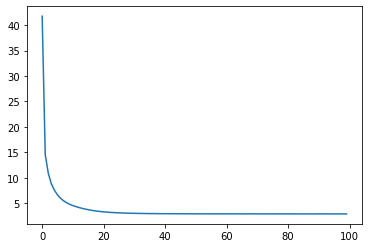

In [23]:
plt.plot(history.history['loss'])
plt.show()

In [24]:
def draw_sample(idx):
    x = data.data[idx]
    
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(x.reshape(8,8), cmap='gray')
    plt.title('Исходное изображение')
    
    plt.subplot(132)
    plt.imshow(encoder.predict(x.reshape(-1, 64)).reshape(2,8), cmap='gray')
    plt.title('Скрытый (латентный) вектор')

    plt.subplot(133)
    plt.imshow(model.predict(x.reshape(-1, 64)).reshape(8,8), cmap='gray')
    plt.title('Восстановленное изображение')
    
    plt.show()

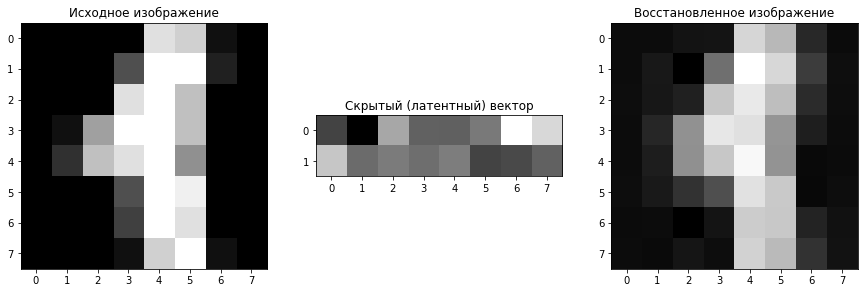

In [25]:
draw_sample(11)

<a href='#contents'>Назад к Содержанию</a>

# Пример 1: кластерный анализ датасета iris  <a name='example1'></a>

In [76]:
data = load_iris()

In [77]:
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [88]:
model = KMeans(3)
result = model.fit_transform(data.data)

In [89]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

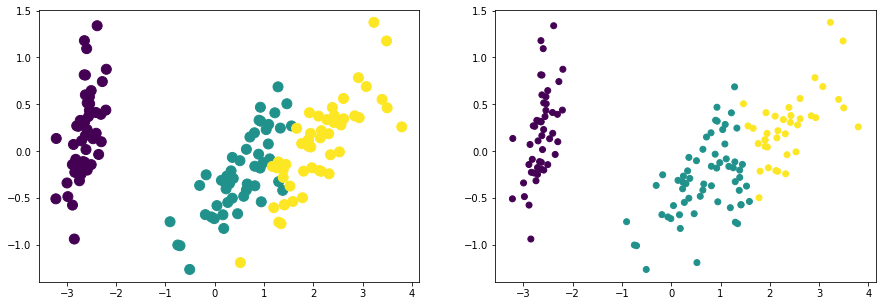

In [90]:
points = PCA(2).fit_transform(data.data)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(points[:,0], points[:,1], s=100, c=data.target)
plt.subplot(122)
plt.scatter(points[:,0], points[:,1], c=model.labels_)
plt.show()

Анализ оптимального количества кластеров "методом локтя".

In [81]:
inertias = []

for i in range(1,10):
    model = KMeans(i)
    model.fit_transform(data.data)
    inertias.append(model.inertia_)

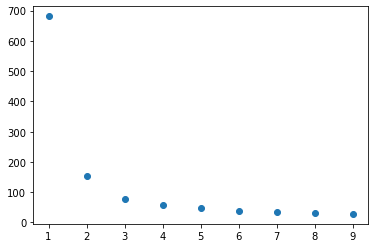

In [82]:
plt.scatter(range(1,10), inertias)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Пример 2: наборы точек make_blobs  <a name='example2'></a>

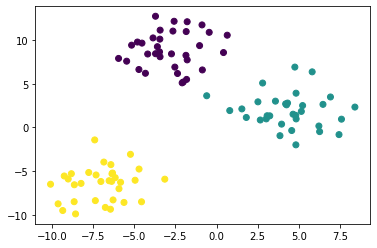

In [32]:
X, y = make_blobs(n_samples=100, shuffle=True, cluster_std=2, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Пример 3: вложенные окружности make_circles  <a name='example3'></a>

In [33]:
X, y = make_circles(n_samples=100,
                    shuffle=True,
                    noise=0.1,
                    random_state=42,
                    factor=0.6)

In [34]:
X.shape, y.shape

((100, 2), (100,))

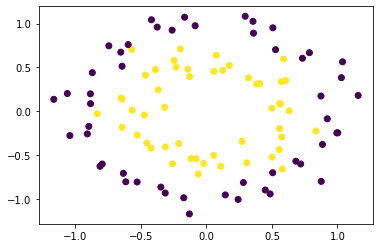

In [35]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Пример 4: полумесяцы make_moons  <a name='example4'></a>

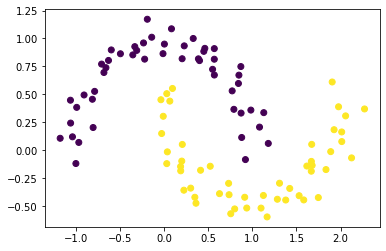

In [36]:
X, y = make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Пример 5: использование TSNE для визуализации кластеров  <a name='example5'></a>

In [37]:
data = load_digits()

In [38]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [39]:
tsne = TSNE(n_components=2)
result = tsne.fit_transform(data.data)

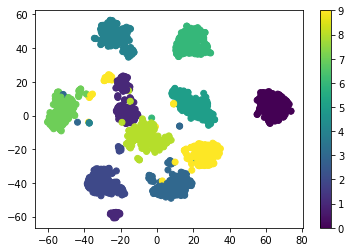

In [40]:
plt.scatter(result[:,0], result[:,1], c=data.target)
plt.colorbar()
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Пример 6: обработка текстов  <a name='example6'></a>

In [41]:
info = fetch_20newsgroups()
dir(info), info.target_names

(['DESCR', 'data', 'filenames', 'target', 'target_names'],
 ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'])

In [42]:
data, target = fetch_20newsgroups(shuffle=True, random_state=1,
                                  remove=('headers', 'footers', 'quotes'),
                                  return_X_y=True)

В рабочем датасете 11314 статей, которые относятся к двадцати различным темам (размечены метками классов от 0 до 19).

In [43]:
len(data), set(np.unique(target))-set(range(20))

(11314, set())

In [44]:
data[0], target[0], info.target_names[target[0]]

("Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 17,
 'talk.politics.mideast')

In [45]:
np.bincount(target), len(np.bincount(target))

(array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]),
 20)

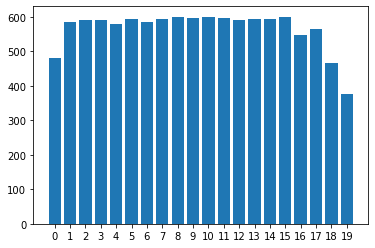

In [46]:
plt.bar(range(20), np.bincount(target))
plt.xticks(range(20))
plt.show()

In [47]:
data_p = data[:500]
target_p = target[:500]

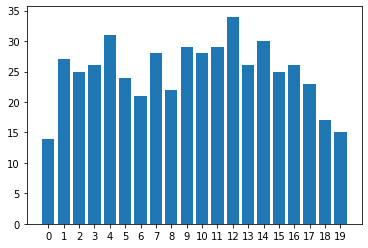

In [48]:
plt.bar(range(20), np.bincount(target_p))
plt.xticks(range(20))
plt.show()

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [50]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(data_p)
result

<500x13270 sparse matrix of type '<class 'numpy.float64'>'
	with 49152 stored elements in Compressed Sparse Row format>

In [51]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_p)
X = X.toarray()

In [52]:
word2vec = vectorizer.vocabulary_
vec2word = {v:k for k,v in word2vec.items()}
vec2word[2]

'000005102000'

In [53]:
word2vec = vectorizer.vocabulary_
vec2word = {v:k for k,v in word2vec.items()}

In [54]:
a = X[0]
for idx in np.argwhere(a==2).squeeze():
    print(vec2word[idx], end=", ")

and, are, as, israeli, israels, it, of, seem, they, what, 

In [55]:
len(vectorizer.vocabulary_), len(vectorizer.get_feature_names())

(13270, 13270)

In [56]:
%%time

U, s, V = np.linalg.svd(X.T)

CPU times: user 2min 23s, sys: 3.79 s, total: 2min 27s
Wall time: 2min 29s


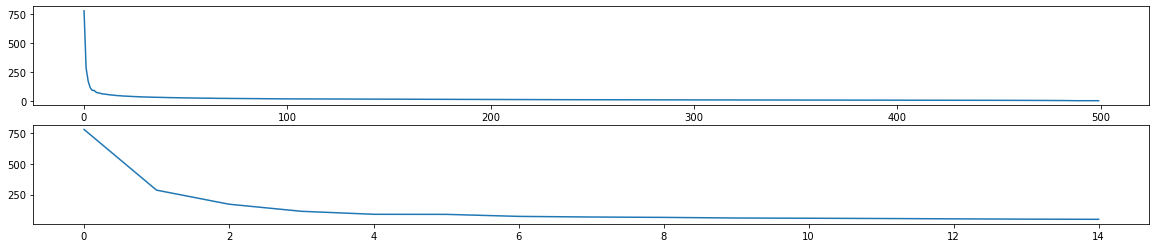

array([7.7975e+02, 2.8612e+02, 1.7167e+02, 1.1394e+02, 8.9570e+01,
       8.8930e+01, 7.2530e+01, 6.7490e+01, 6.4430e+01, 5.9310e+01,
       5.7480e+01, 5.5290e+01, 5.2580e+01, 5.0060e+01, 4.8800e+01,
       4.7340e+01, 4.4340e+01, 4.4130e+01, 4.2270e+01, 4.0930e+01,
       3.9950e+01, 3.9430e+01, 3.7490e+01, 3.6120e+01, 3.6100e+01,
       3.5670e+01, 3.5150e+01, 3.4360e+01, 3.3390e+01, 3.2370e+01,
       3.2130e+01, 3.1840e+01, 3.1590e+01, 3.0770e+01, 3.0090e+01,
       2.9840e+01, 2.9330e+01, 2.8700e+01, 2.8490e+01, 2.7960e+01,
       2.7610e+01, 2.7120e+01, 2.6960e+01, 2.6820e+01, 2.6250e+01,
       2.5730e+01, 2.5590e+01, 2.5080e+01, 2.4950e+01, 2.4800e+01,
       2.4340e+01, 2.4040e+01, 2.3780e+01, 2.3310e+01, 2.3150e+01,
       2.2990e+01, 2.2600e+01, 2.2390e+01, 2.2240e+01, 2.1870e+01,
       2.1810e+01, 2.1470e+01, 2.1310e+01, 2.1050e+01, 2.0990e+01,
       2.0670e+01, 2.0500e+01, 2.0330e+01, 2.0050e+01, 1.9790e+01,
       1.9650e+01, 1.9430e+01, 1.9300e+01, 1.9000e+01, 1.8860e

In [57]:
plt.figure(figsize=(20,4))
plt.subplot(211)
plt.plot(s)
plt.subplot(212)
plt.plot(s[:15])
plt.show()
s.round(2)

In [58]:
V[0].round(1)

array([-0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0.6,
       -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
       -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0.1, -0. , -0. ,
       -0. , -0.1, -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
       -0. , -0. , -0. , -0. , -0. , -0. , -0. ,  0. , -0. , -0. , -0. ,
       -0.1, -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
       -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0.1, -0. ,
       -0. , -0. , -0.1, -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
       -0. ,  0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
       -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
       -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
       -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
       -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,
       -0. , -0. , -0. , -0. , -0. , -0. , -0. ,  0

In [59]:
from sklearn.decomposition import PCA 

In [60]:
pca = PCA(n_components=2)
coords = pca.fit_transform(V.T)

In [61]:
coords.shape

(500, 2)

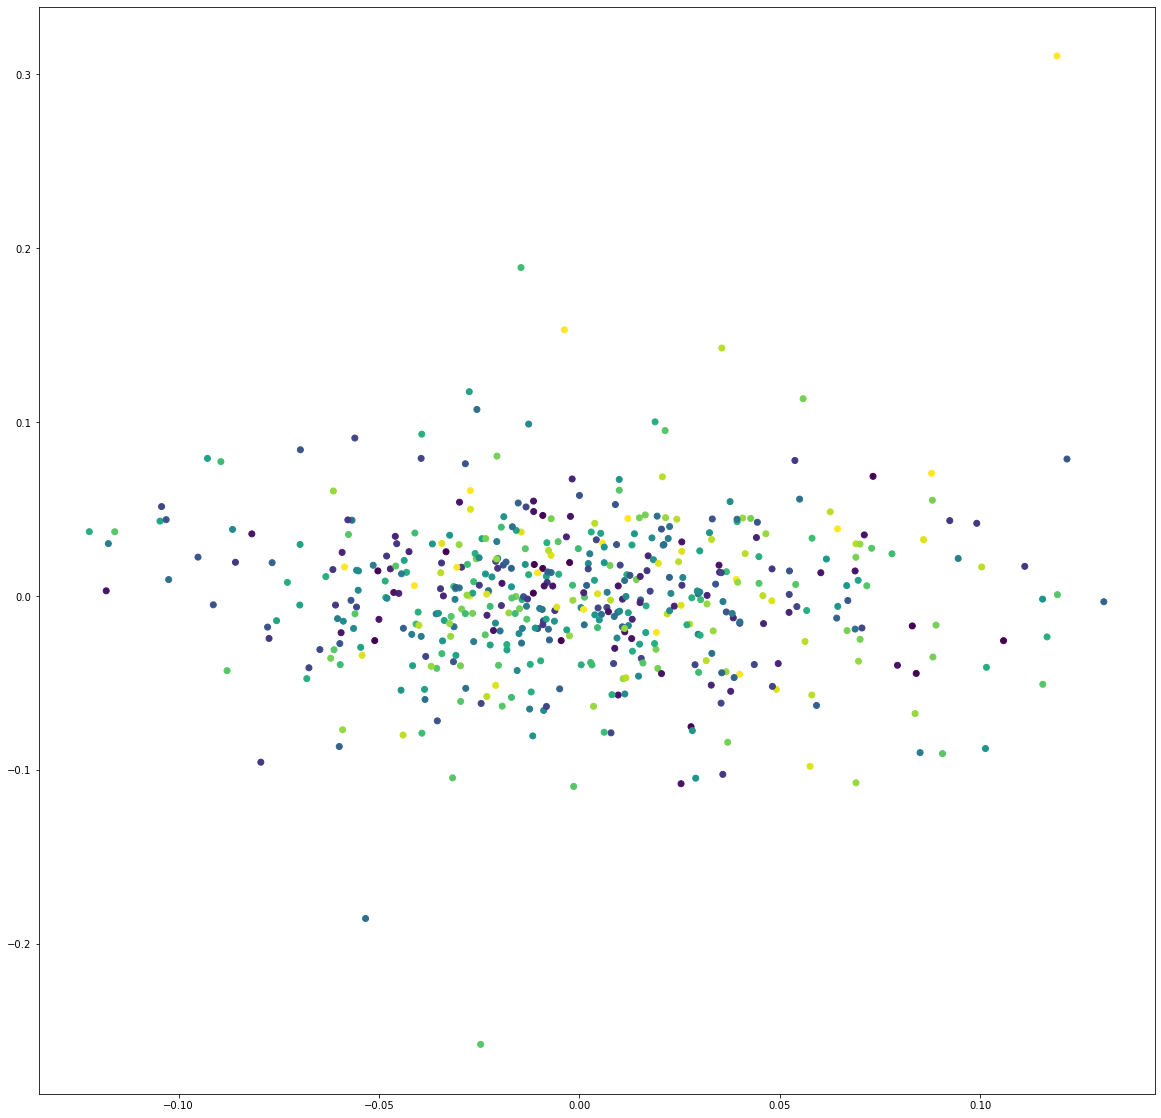

In [62]:
plt.figure(figsize=(20,20))
plt.scatter(coords[:,0], coords[:,1], c=target_p)
plt.show()

<a href='#contents'>Назад к Содержанию</a>

# Пример 7: сингулярное разложение матриц <a name='example7'></a>



Ищется разложение матрицы в виде произведения трех матриц специального вида (по аналогии с разложением сложного числа на простые множители)

$$
A = U S V^T
$$

Создание датасета

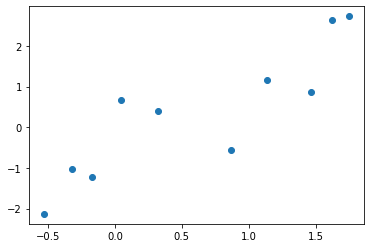

In [63]:
np.random.seed(1)
data = np.random.normal(size=(10,2))
data[:,1] += 2*data[:,0]
plt.scatter(data[:,0], data[:,1])
plt.show()

In [64]:
U, s, V = np.linalg.svd(data)

In [65]:
U.shape, U, U[:,0]

((10, 10),
 array([[-5.45665724e-01, -3.12902134e-02, -2.49629605e-01,
         -5.45370924e-01, -9.85260561e-02, -4.41580422e-01,
          1.06468333e-01, -3.47814185e-01,  6.42329684e-02,
         -1.97158593e-02],
        [ 3.70169603e-01, -3.86095327e-01, -5.82695197e-01,
          1.73720682e-01, -6.53956337e-03, -3.48866507e-01,
         -2.14514025e-01, -9.75319538e-02, -3.48499308e-01,
          2.13216259e-01],
        [ 8.66695964e-03, -6.32192773e-01,  7.05107286e-01,
         -5.05243465e-02, -2.46912773e-02, -2.41806730e-01,
         -6.42533774e-02, -1.17716652e-01, -1.28673907e-01,
          8.30984428e-02],
        [-5.70361616e-01, -6.60382337e-02, -4.30087362e-02,
          7.94803351e-01, -3.41547760e-02, -1.28507609e-01,
          5.39444820e-02, -1.14848457e-01,  4.93893408e-02,
         -2.33286066e-02],
        [-8.75935511e-02, -4.64039375e-02, -2.35305237e-02,
         -3.45851824e-02,  9.93310914e-01, -3.36953111e-02,
          4.65180986e-03, -2.44792839e-02

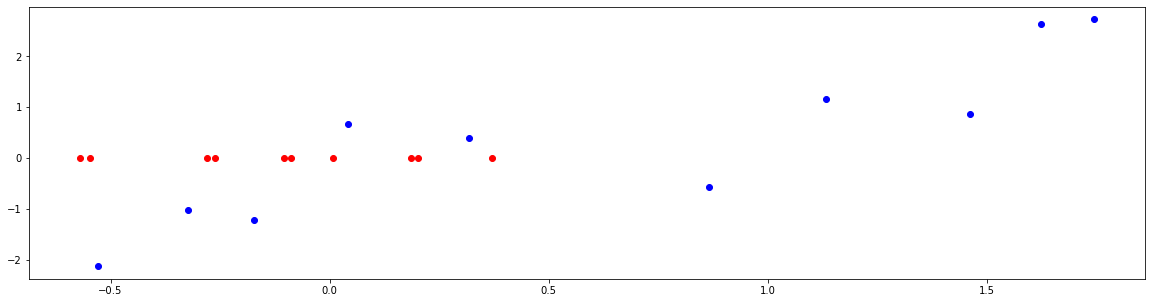

In [66]:
plt.figure(figsize=(20,5))
plt.scatter(data[:,0], data[:,1], c='b')
plt.scatter(U[:,0], np.zeros(len(U)), c='r')
plt.show()

In [67]:
s

array([5.67501007, 1.63793157])

In [68]:
S = np.zeros((len(U), len(V)))
np.fill_diagonal(S, s)
S

array([[5.67501007, 0.        ],
       [0.        , 1.63793157],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [69]:
V.shape

(2, 2)

In [70]:
U.dot(S).dot(V)

array([[ 1.62434536,  2.63693431],
       [-0.52817175, -2.12931213],
       [ 0.86540763, -0.57072344],
       [ 1.74481176,  2.72841663],
       [ 0.3190391 ,  0.38870782],
       [ 1.46210794,  0.86407516],
       [-0.3224172 , -1.02888876],
       [ 1.13376944,  1.16764762],
       [-0.17242821, -1.22271483],
       [ 0.04221375,  0.66724271]])

In [71]:
np.sum(data-U.dot(S).dot(V))

9.96425164601078e-15

<a href='#contents'>Назад к Содержанию</a>

# Ссылки <a name='links'></a>

- sklearn.cluster
- http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
- "Метрики в задачах кластеризации" https://habr.com/ru/company/yandex/blog/500742/

<a href='#contents'>Назад к Содержанию</a>